# This is machine learning model on supervised dataset.

In [66]:
# importing necessary librarirs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing dataset with the help of pandas library in python.

In [21]:
data = pd.read_excel('C:/Users/PC/Downloads/mldataset.xlsx')
data = data.rename(columns={'resting_blood_pressure':'resting_bp', 'maximum_heart_rate_achieved':'max_hr'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EmployeeID           299 non-null    int64  
 1   Age                  299 non-null    int64  
 2   DailyRate            299 non-null    int64  
 3   EducationField       299 non-null    object 
 4   Gender               299 non-null    object 
 5   HourlyRate           299 non-null    int64  
 6   JobRole              299 non-null    object 
 7   JobSatisfaction      299 non-null    int64  
 8   MaritalStatus        299 non-null    object 
 9   MonthlyIncome        299 non-null    int64  
 10  OverTime             299 non-null    object 
 11  accx                 299 non-null    float64
 12  accy                 299 non-null    float64
 13  accz                 299 non-null    float64
 14  resting_bp           299 non-null    int64  
 15  max_hr               299 non-null    int

In [22]:
# Dropping columns that aren't useful to check performance of employee

data = data.drop('EmployeeID', axis=1)
data = data.drop('MaritalStatus', axis=1)
data = data.drop('Gender', axis=1)
data = data.drop('JobRole', axis=1)
data = data.drop('HourlyRate', axis=1)
data = data.drop('weight ', axis=1)
data = data.drop('height ', axis=1)


The initial step before model building is data preprocessing. It contains handling missing values, handling duplicate values,
Outlier analysis, variance check and many more.

In [23]:
# missing values
data.isna().sum()
# No missing vales

Age                    0
DailyRate              0
EducationField         0
JobSatisfaction        0
MonthlyIncome          0
OverTime               0
accx                   0
accy                   0
accz                   0
resting_bp             0
max_hr                 0
index                  0
Total_working_hours    0
PerformanceRating      0
dtype: int64

<AxesSubplot: >

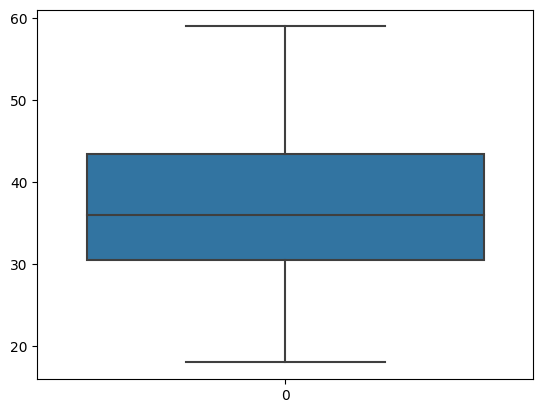

In [24]:
# outliers
sns.boxplot(data.Age)


<AxesSubplot: >

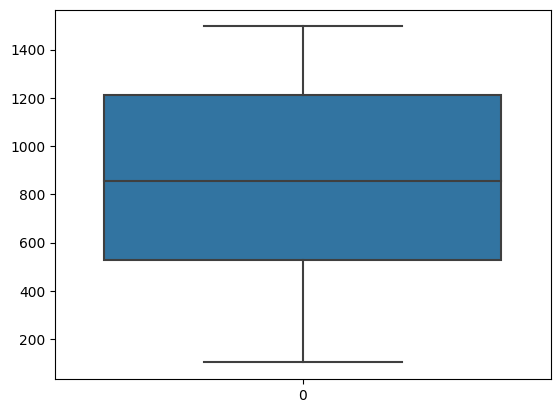

In [25]:
sns.boxplot(data.DailyRate)


<AxesSubplot: >

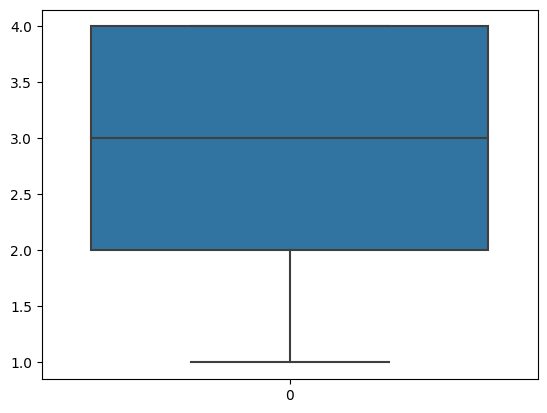

In [26]:
sns.boxplot(data.JobSatisfaction)


<AxesSubplot: >

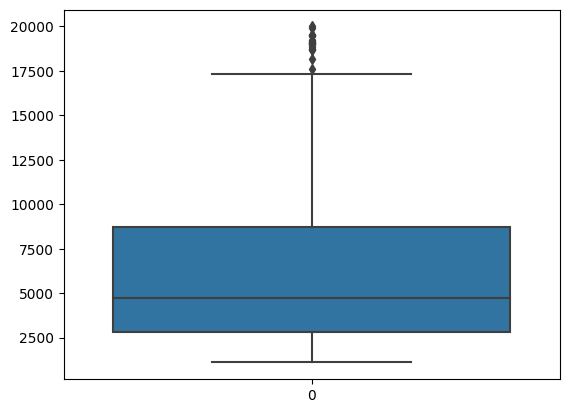

In [27]:
sns.boxplot(data.MonthlyIncome)     # having outliers


<AxesSubplot: >

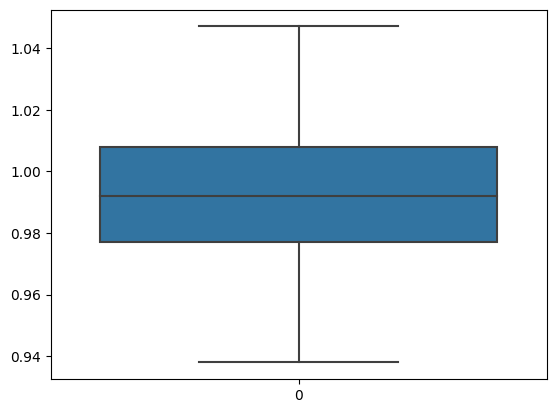

In [36]:
sns.boxplot(data.accx)


<AxesSubplot: >

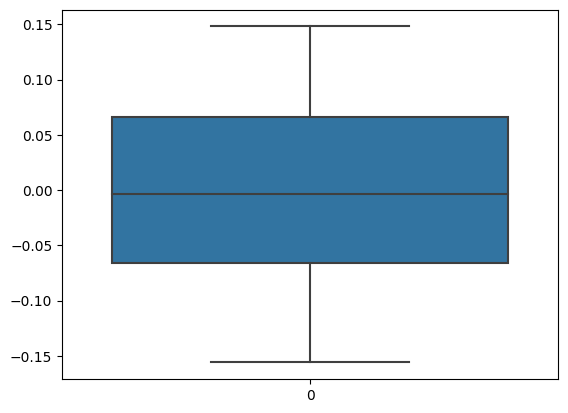

In [37]:
sns.boxplot(data.accy)


<AxesSubplot: >

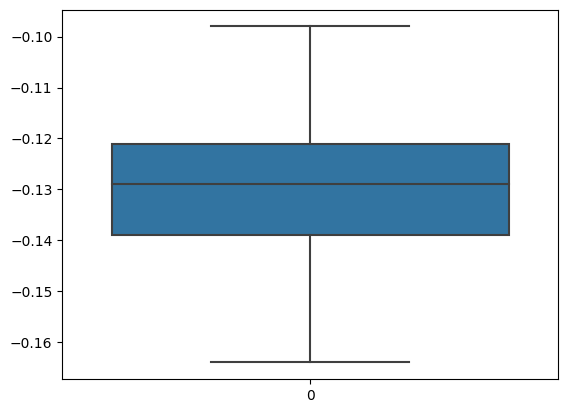

In [38]:
sns.boxplot(data.accz)


<AxesSubplot: >

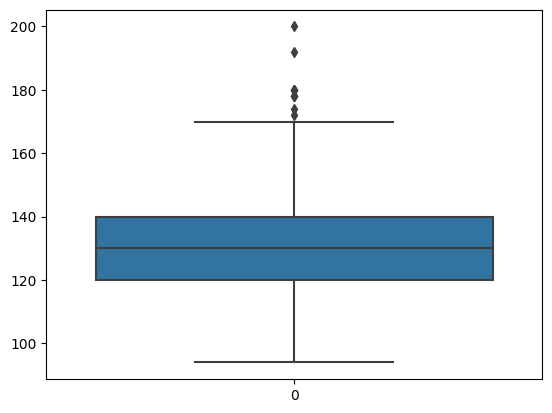

In [40]:
sns.boxplot(data.resting_bp)   # having outliers


<AxesSubplot: >

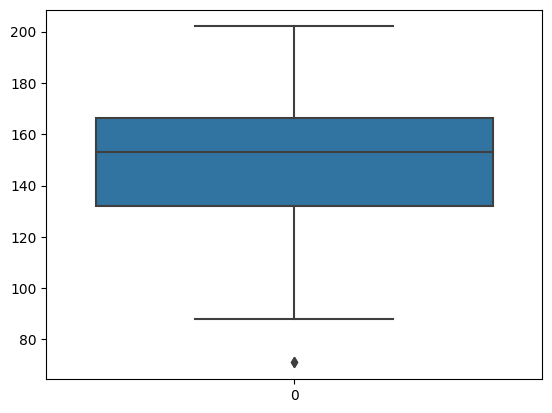

In [41]:
sns.boxplot(data.max_hr)   # having outliers


<AxesSubplot: >

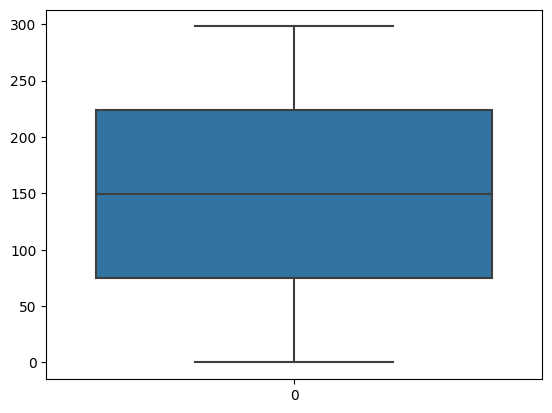

In [42]:
sns.boxplot(data.index)


<AxesSubplot: >

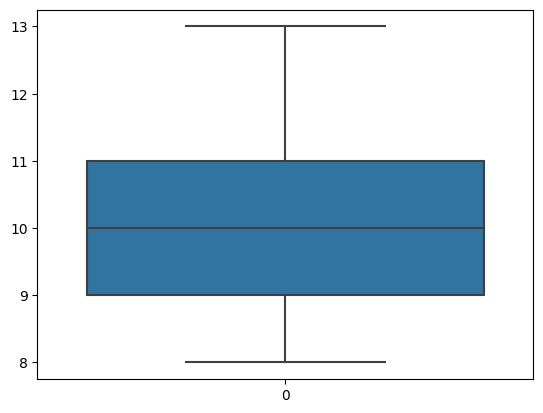

In [43]:
sns.boxplot(data.Total_working_hours)

<AxesSubplot: >

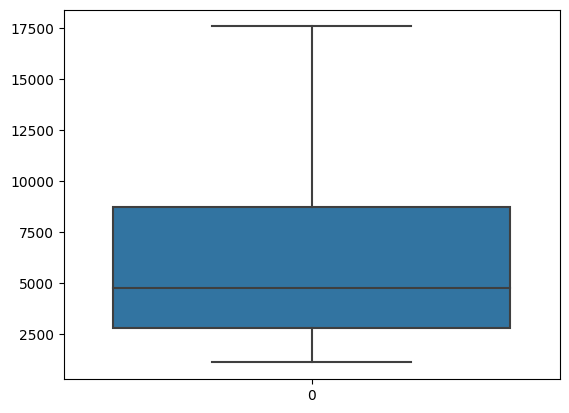

In [28]:
#### Winsorization ####
# pip install feature_engine   
# install the package
# conda install -c conda-forge feature_engine
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['MonthlyIncome'])
data['MonthlyIncome'] = winsor.fit_transform(data[['MonthlyIncome']])

# we can inspect the minimum caps and maximum caps 
# winsor.left_tail_caps_, winsor.right_tail_caps_

# lets see boxplot
sns.boxplot(data.MonthlyIncome)

<AxesSubplot: >

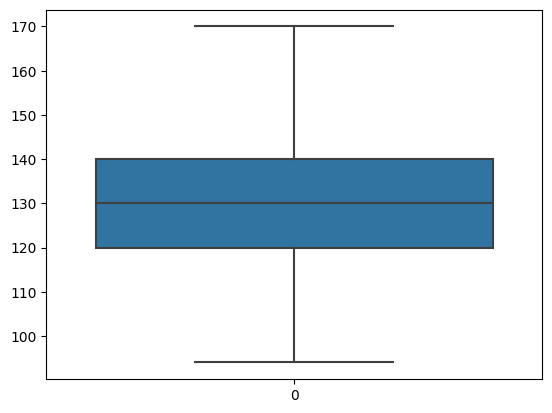

In [29]:
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['resting_bp'])
data['resting_bp'] = winsor.fit_transform(data[['resting_bp']])
# lets see boxplot
sns.boxplot(data.resting_bp)

<AxesSubplot: >

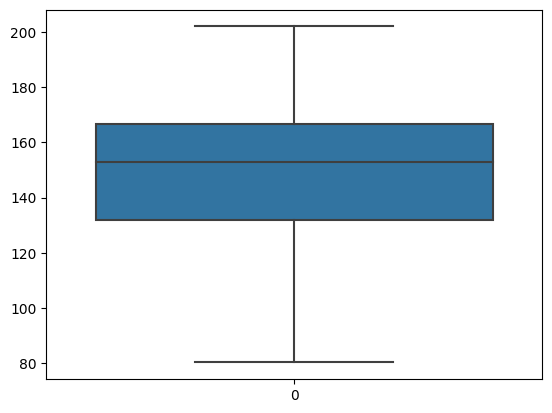

In [30]:
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['max_hr'])
data['max_hr'] = winsor.fit_transform(data[['max_hr']])
# lets see boxplot
sns.boxplot(data.max_hr)

In [31]:
# variance
data.var() # No any feature is having zero variance

C:\Users\PC\AppData\Local\Temp\ipykernel_10644\1662099064.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var() # No any feature is having zero variance


Age                    8.917084e+01
DailyRate              1.631461e+05
JobSatisfaction        1.221342e+00
MonthlyIncome          2.147263e+07
accx                   4.777132e-04
accy                   6.332637e-03
accz                   1.465250e-04
resting_bp             2.879984e+02
max_hr                 5.488809e+02
index                  1.778479e+00
Total_working_hours    1.420237e+00
PerformanceRating      1.548113e-01
dtype: float64

In [32]:
# duplication
duplicate = data.duplicated()
duplicate
sum(duplicate)  # No duplicates

0

In [33]:
# categorical to numeric
from sklearn.preprocessing import LabelEncoder
# Creating instance of labelencoder
labelencoder = LabelEncoder()

data['OverTime'] = labelencoder.fit_transform(data['OverTime'])
data['EducationField'].replace(to_replace=['Post graduation diploma', 'Graduation', 'Technical Degree', 'Diploma', 'Human Resources', 'Other'], value=[1, 2, 3, 4, 5, 6], inplace=True)

In [34]:
X = data.drop('PerformanceRating', axis = 1)
Y = data['PerformanceRating']

In [36]:

# Normalization
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

data_norm = norm_func(X)
data_norm.describe()

data = pd.concat([data_norm, Y], axis=1, join='inner')
data.columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  299 non-null    float64
 1   DailyRate            299 non-null    float64
 2   EducationField       299 non-null    float64
 3   JobSatisfaction      299 non-null    float64
 4   MonthlyIncome        299 non-null    float64
 5   OverTime             299 non-null    float64
 6   accx                 299 non-null    float64
 7   accy                 299 non-null    float64
 8   accz                 299 non-null    float64
 9   resting_bp           299 non-null    float64
 10  max_hr               299 non-null    float64
 11  index                299 non-null    float64
 12  Total_working_hours  299 non-null    float64
 13  PerformanceRating    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.8 KB


Now The data is cleaned and well prepared to create a model. We will split the data into train and test splits. But before that, we will go for Exploratory data analysis. From this, we can visualize the data and draw insights from it.

In [68]:
# Exploratory Data Analysis
# Measures of Central Tendency / First moment business decision
data.mean() # '.' is used to refer to the variables within object

Age                    0.470756
DailyRate              0.535417
EducationField         0.398662
JobSatisfaction        0.599777
MonthlyIncome          0.319603
OverTime               0.290970
accx                   0.515848
accy                   0.502629
accz                   0.504763
resting_bp             0.482001
max_hr                 0.566618
index                  0.755184
Total_working_hours    0.384615
PerformanceRating      3.190635
dtype: float64

In [69]:
data.median()

Age                    0.439024
DailyRate              0.541278
EducationField         0.400000
JobSatisfaction        0.666667
MonthlyIncome          0.220789
OverTime               0.000000
accx                   0.495413
accy                   0.500000
accz                   0.530303
resting_bp             0.473684
max_hr                 0.597536
index                  0.800000
Total_working_hours    0.400000
PerformanceRating      3.000000
dtype: float64

In [71]:
data.mode

<bound method DataFrame.mode of           Age  DailyRate  EducationField  JobSatisfaction  MonthlyIncome  \
0    0.560976   0.717157             0.6         1.000000       0.296915   
1    0.756098   0.126346             0.6         0.333333       0.244525   
2    0.463415   0.911701             1.0         0.666667       0.059978   
3    0.365854   0.925341             0.6         0.666667       0.109696   
4    0.219512   0.350323             0.2         0.333333       0.143631   
..        ...        ...             ...              ...            ...   
294  0.463415   0.564250             0.2         1.000000       0.074305   
295  0.585366   0.324480             0.0         0.333333       0.754155   
296  0.000000   0.091170             0.6         0.666667       0.019305   
297  0.414634   0.810481             0.0         0.333333       0.419966   
298  0.439024   0.332376             0.6         1.000000       0.156987   

     OverTime      accx      accy      accz  resting_bp

In [72]:
# Measures of Dispersion / Second moment business decision
data.var() # variance

Age                    0.053046
DailyRate              0.084076
EducationField         0.063622
JobSatisfaction        0.135705
MonthlyIncome          0.079132
OverTime               0.206999
accx                   0.040208
accy                   0.068523
accz                   0.033638
resting_bp             0.049861
max_hr                 0.037029
index                  0.071139
Total_working_hours    0.056809
PerformanceRating      0.154811
dtype: float64

In [73]:
data.std() # standard deviation

Age                    0.230318
DailyRate              0.289959
EducationField         0.252235
JobSatisfaction        0.368381
MonthlyIncome          0.281304
OverTime               0.454971
accx                   0.200520
accy                   0.261769
accz                   0.183405
resting_bp             0.223296
max_hr                 0.192429
index                  0.266719
Total_working_hours    0.238347
PerformanceRating      0.393461
dtype: float64

In [74]:
# Third moment business decision
data.skew()

Age                    0.461617
DailyRate             -0.161251
EducationField         0.164221
JobSatisfaction       -0.406664
MonthlyIncome          1.242573
OverTime               0.925060
accx                   0.279405
accy                  -0.010741
accz                  -0.430145
resting_bp             0.364220
max_hr                -0.515044
index                 -1.053125
Total_working_hours    0.293020
PerformanceRating      1.583120
dtype: float64

In [75]:
# Fourth moment business decision
data.kurt()

Age                   -0.408716
DailyRate             -1.133008
EducationField        -0.712755
JobSatisfaction       -1.182290
MonthlyIncome          0.468279
OverTime              -1.152016
accx                  -0.716669
accy                  -1.059881
accz                  -0.386556
resting_bp            -0.239971
max_hr                -0.258003
index                  0.461593
Total_working_hours   -0.057914
PerformanceRating      0.509634
dtype: float64

In [77]:
# shape of data
data.shape

(299, 14)

In [78]:
data.dtypes

Age                    float64
DailyRate              float64
EducationField         float64
JobSatisfaction        float64
MonthlyIncome          float64
OverTime               float64
accx                   float64
accy                   float64
accz                   float64
resting_bp             float64
max_hr                 float64
index                  float64
Total_working_hours    float64
PerformanceRating        int64
dtype: object

In [79]:
data.describe()

,Age,DailyRate,EducationField,JobSatisfaction,MonthlyIncome,OverTime,accx,accy,accz,resting_bp,max_hr,index,Total_working_hours,PerformanceRating
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.470756,0.535417,0.398662,0.599777,0.319603,0.290970,0.515848,0.502629,0.504763,0.482001,0.566618,0.755184,0.384615,3.190635
std,0.230318,0.289959,0.252235,0.368381,0.281304,0.454971,0.200520,0.261769,0.183405,0.223296,0.192429,0.266719,0.238347,0.393461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.304878,0.304379,0.200000,0.333333,0.102685,0.000000,0.357798,0.296053,0.378788,0.342105,0.425051,0.600000,0.200000,3.000000
50%,0.439024,0.541278,0.400000,0.666667,0.220789,0.000000,0.495413,0.500000,0.530303,0.473684,0.597536,0.800000,0.400000,3.000000
75%,0.621951,0.796482,0.600000,1.000000,0.461611,1.000000,0.642202,0.730263,0.651515,0.605263,0.708419,1.000000,0.600000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


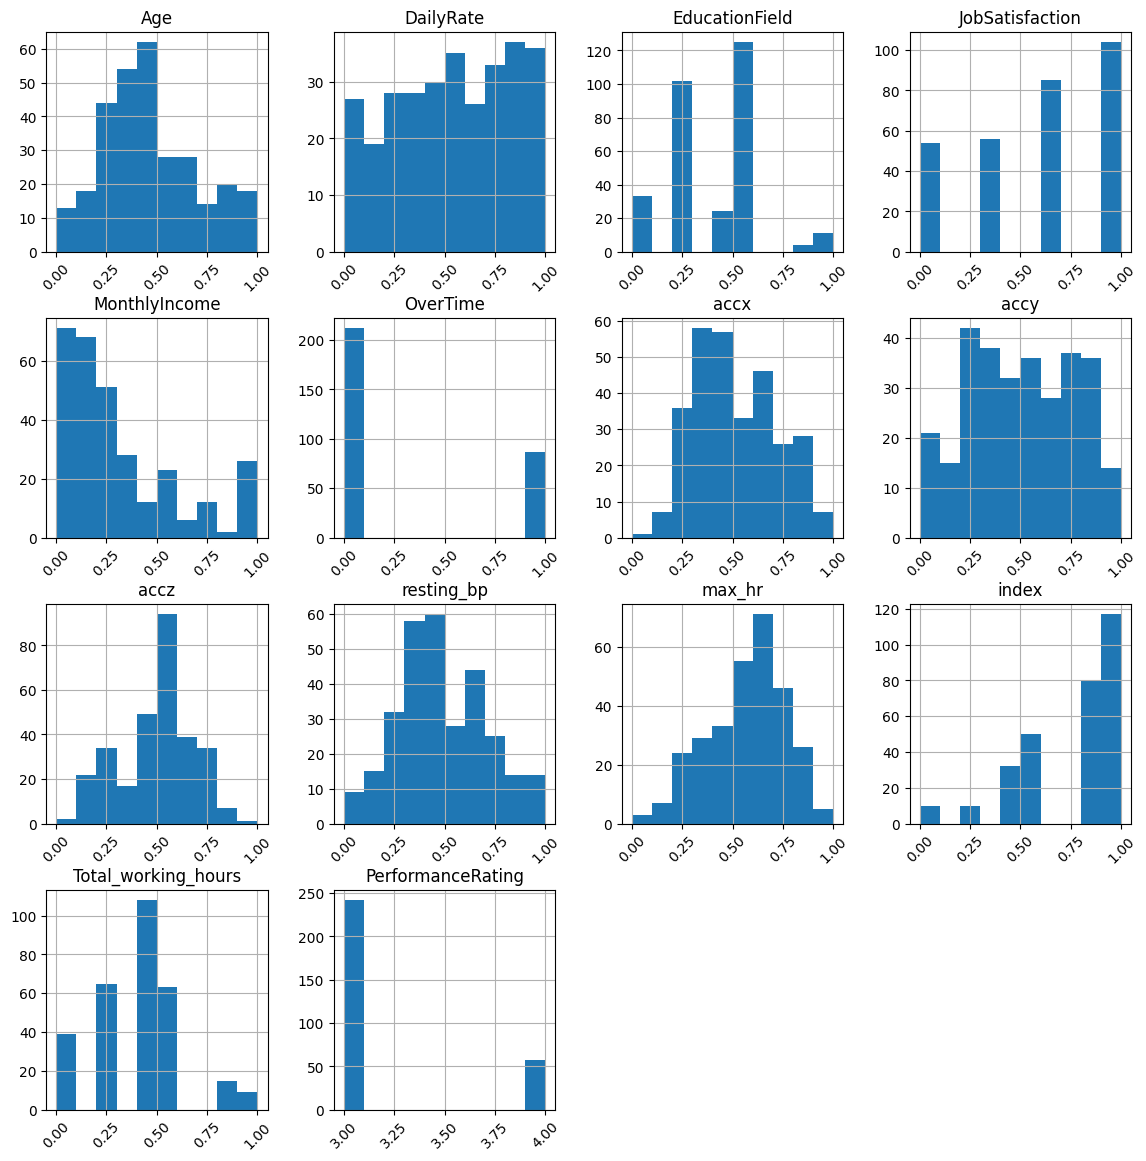

In [84]:
# Combined histogram 
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [85]:
# getting correlation
corrs = data.corr()
corrs

,Age,DailyRate,EducationField,JobSatisfaction,MonthlyIncome,OverTime,accx,accy,accz,resting_bp,max_hr,index,Total_working_hours,PerformanceRating
Age,1.000000,0.015989,0.003833,-0.031814,0.482066,0.107641,-0.021014,-0.020202,-0.011429,0.033904,-0.109260,-0.080429,-0.055784,-0.019109
DailyRate,0.015989,1.000000,-0.007439,0.013037,0.014272,-0.055653,-0.028691,0.110192,0.141185,0.016347,0.085720,-0.021623,0.010961,0.014640
EducationField,0.003833,-0.007439,1.000000,0.054409,0.050095,-0.002445,-0.048640,-0.038565,-0.094161,0.041434,-0.048385,0.070933,0.035380,0.009341
JobSatisfaction,-0.031814,0.013037,0.054409,1.000000,0.010009,-0.030312,0.046769,0.118476,0.038345,0.146168,0.055167,0.039971,-0.039787,-0.050640
MonthlyIncome,0.482066,0.014272,0.050095,0.010009,1.000000,0.047696,-0.097103,-0.043979,0.019756,0.006584,-0.070470,-0.007687,0.033982,-0.103839
OverTime,0.107641,-0.055653,-0.002445,-0.030312,0.047696,1.000000,-0.136935,-0.125731,-0.081253,0.000003,-0.030384,0.024860,0.016663,0.007774
accx,-0.021014,-0.028691,-0.048640,0.046769,-0.097103,-0.136935,1.000000,0.589543,0.188588,-0.064948,0.062323,0.111355,-0.059877,-0.051103
accy,-0.020202,0.110192,-0.038565,0.118476,-0.043979,-0.125731,0.589543,1.000000,0.292982,-0.086810,0.074820,0.060349,-0.027162,-0.025460
accz,-0.011429,0.141185,-0.094161,0.038345,0.019756,-0.081253,0.188588,0.292982,1.000000,-0.070135,-0.012048,-0.019735,-0.003436,-0.049264
resting_bp,0.033904,0.016347,0.041434,0.146168,0.006584,0.000003,-0.064948,-0.086810,-0.070135,1.000000,-0.056376,-0.000986,-0.038239,0.050241


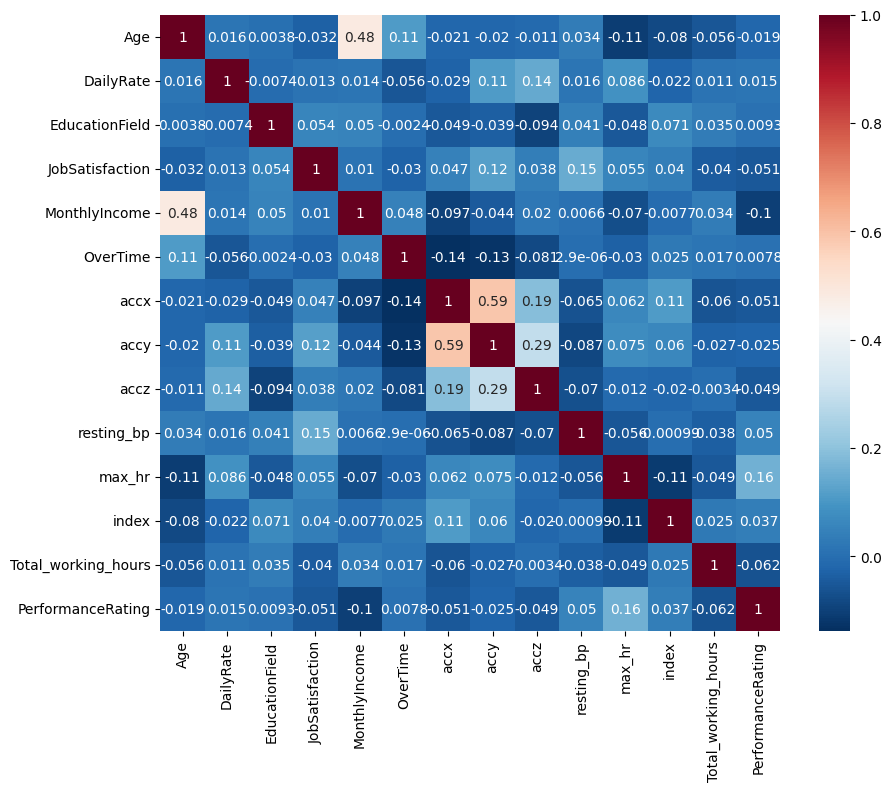

In [86]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()


In [ ]:
# plotting pairplot
sns.pairplot(data)

After preprocessing and EDA, we are going to split the data into train and test datasets for further evaluation on models.

In [82]:
#Split the Data into Training and Testing sets with test size as #30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, shuffle=True)

We will import the classification modules as our dataset has discrete output column. For evaluation, we will import 
metrics and some libraries.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error


Logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))
print("Confuusion matrix = ", confusion_matrix(y_test, y_pred))
print("mean squared error = ",  metrics.mean_squared_error(y_test, y_pred))

Accuracy score =  0.8111111111111111
Confuusion matrix =  [[73  1]
 [16  0]]
mean squared error =  0.18888888888888888


E:\ana new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.tree import DecisionTreeClassifier  
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0) 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))
print("Confuusion matrix = ", confusion_matrix(y_test, y_pred))
print("mean squared error = ",  metrics.mean_squared_error(y_test, y_pred))

Accuracy score =  0.7222222222222222
Confuusion matrix =  [[62 12]
 [13  3]]
mean squared error =  0.2777777777777778


Random forest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))
print("Confuusion matrix = ", confusion_matrix(y_test, y_pred))
print("mean squared error = ",  metrics.mean_squared_error(y_test, y_pred))

Accuracy score =  0.8222222222222222
Confuusion matrix =  [[74  0]
 [16  0]]
mean squared error =  0.17777777777777778


Support vector classifier

In [59]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))
print("Confuusion matrix = ", confusion_matrix(y_test, y_pred))
print("mean squared error = ",  metrics.mean_squared_error(y_test, y_pred))


Accuracy score =  0.8222222222222222
Confuusion matrix =  [[74  0]
 [16  0]]
mean squared error =  0.17777777777777778


K Neighbor classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))
print("Confuusion matrix = ", confusion_matrix(y_test, y_pred))
print("mean squared error = ",  metrics.mean_squared_error(y_test, y_pred))

Accuracy score =  0.8222222222222222
Confuusion matrix =  [[72  2]
 [14  2]]
mean squared error =  0.17777777777777778


Gaussian Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))
print("Confuusion matrix = ", confusion_matrix(y_test, y_pred))
print("mean squared error = ",  metrics.mean_squared_error(y_test, y_pred))


Among the models we tried, we need to choose the one with maximum accuracy and minimum error. And then we got the accurate 
model for further deployment.

In [ ]:
import pickle
import joblib
filename = 'finalized_model.pkl'
joblib.dump(rfmodel, filename)
mdl = joblib.load('finalized_model.pkl')
print(mdl)
with open('finalized_model.pkl', 'wb') as model_file: 
    pickle.dump(rfmodel, model_file)
model = joblib.load('finalized_model.pkl')